In [291]:
# Se Cargan las librerias necesarias

import os
os.environ["OMP_NUM_THREADS"] = "1"
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn.cluster._kmeans")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [293]:
# Se Carga el archivo Mall_Customers.csv en un DataFrame de pandas.
df = pd.read_csv('D:\\UNAD_ANDRES\\Mall_Customers.csv')

In [295]:
# 1.Exploración Inicial de los Datos

print("\nPrimeras filas del conjunto de datos:\n")
print(df.head())

print("\nInformación básica sobre el conjunto de datos:\n")
print(df.info())

print("\nEstadísticas resumidas del conjunto de datos:\n")
print(df.describe())

print("\nValores faltantes en el conjunto de datos:\n")
print(df.isnull().sum())


Primeras filas del conjunto de datos:

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

Información básica sobre el conjunto de datos:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4),

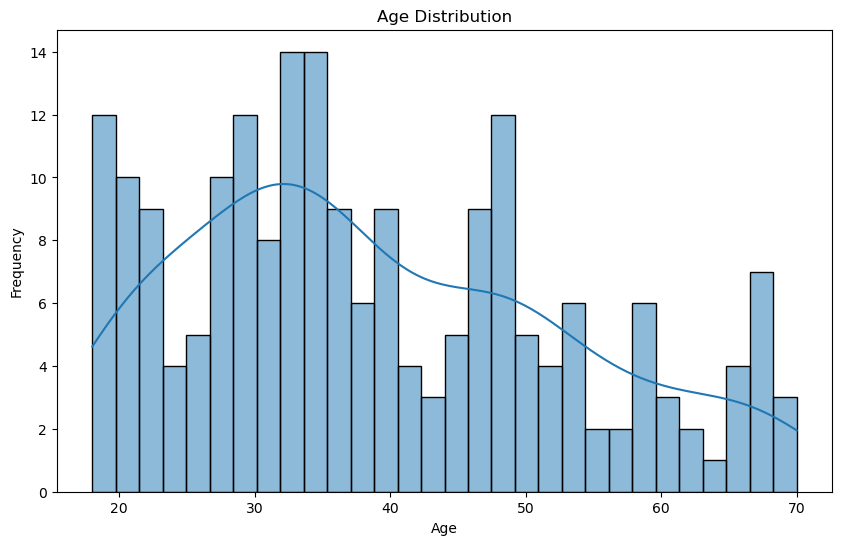

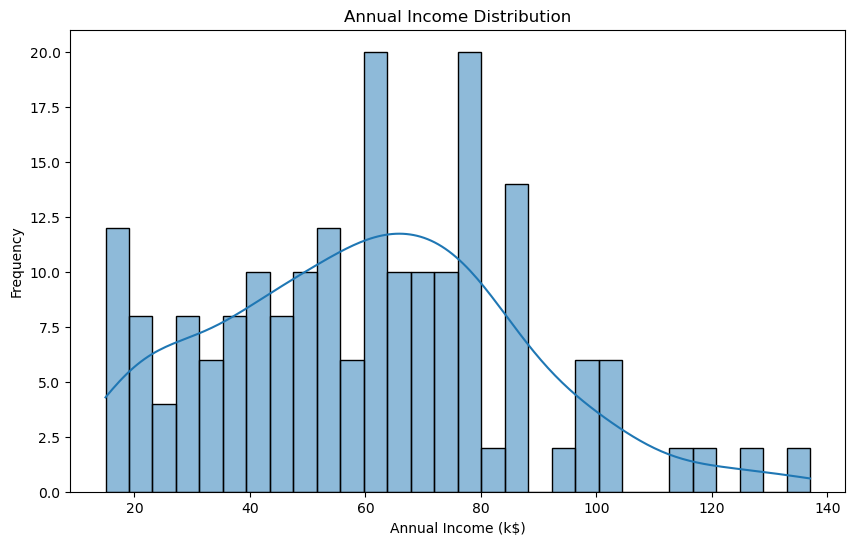

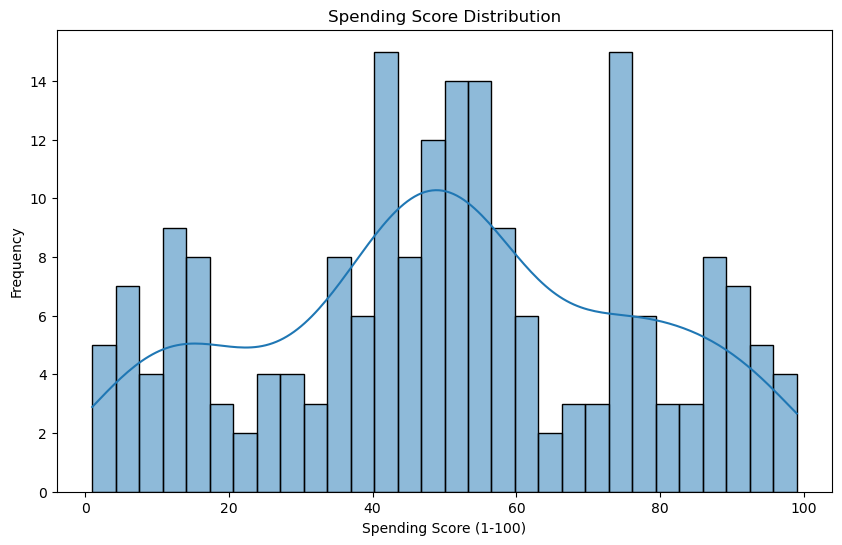

In [297]:
# Creamos histogramas para visualizar la distribución de las variables Age, Annual Income (k$) y Spending Score (1-100).

plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(df['Annual Income (k$)'], bins=30, kde=True)
plt.title('Annual Income Distribution')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(df['Spending Score (1-100)'], bins=30, kde=True)
plt.title('Spending Score Distribution')
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Frequency')
plt.show()

# Mostramos las primeras filas del dataset, información básica, estadísticas descriptivas y verificamos si hay valores faltantes.

In [299]:
# 2.Preprocesamiento de los Datos
# No hay valores faltantes en el conjunto de datos, por lo que no es necesario realizar imputación.

df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])

# Codificamos la variable categórica Gender y escalamos las características numéricas utilizando StandardScaler.

In [301]:
# 3.Selección de Características

X = scaled_features

# Seleccionamos todas las características escaladas para el entrenamiento de los modelos de clustering.

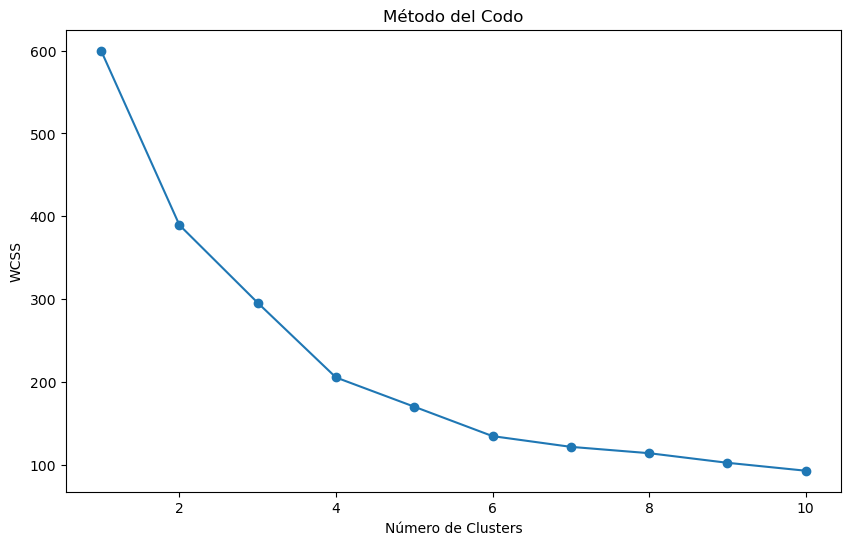

In [303]:
# 4. K-means Clustering
# Determinar el número óptimo de clusters utilizando el método del codo

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Método del Codo')
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS')
plt.show()

# El número óptimo de clusters se determina usando el método del codo.
# Observamos que el punto de codo ocurre en k=5, ya que el WCSS deja de disminuir significativamente.

# Entrenar el modelo de K-means con 5 clusters.
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X)

In [305]:
# 5.Evaluación de K-means Clustering

silhouette_avg = silhouette_score(X, kmeans_labels)
calinski_harabasz_avg = calinski_harabasz_score(X, kmeans_labels)
print(f"\nK-means Clustering - Silhouette Score: {silhouette_avg}")
print(f"K-means Clustering - Calinski-Harabasz Index: {calinski_harabasz_avg}")

# Calculamos y mostramos las métricas de evaluación: Coeficiente de Silhouette y el Índice de Calinski-Harabasz.


K-means Clustering - Silhouette Score: 0.41664341513732767
K-means Clustering - Calinski-Harabasz Index: 125.10094020060954


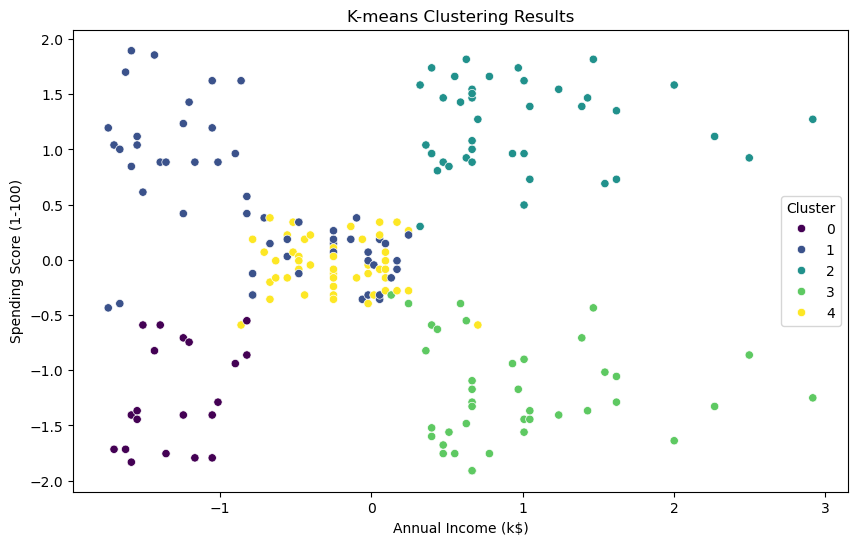

In [307]:
# 6. Visualización de Resultados de K-means

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X[:, 1], y=X[:, 2], hue=kmeans_labels, palette='viridis')
plt.title('K-means Clustering Results')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.show()

# Visualizamos los resultados del clustering de K-means en un gráfico de dispersión.

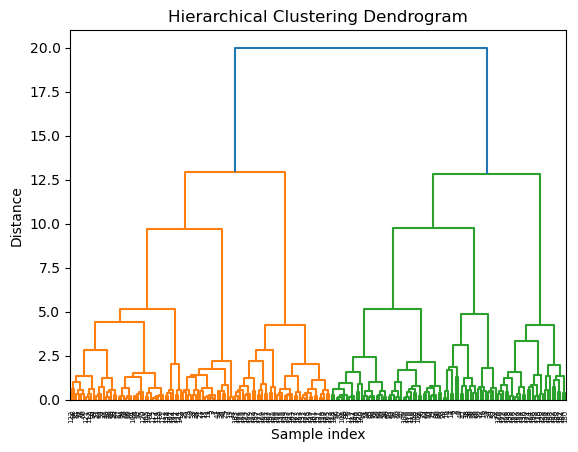

In [309]:
# Hierarchical Clustering

linked = linkage(X, method='ward')
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

hierarchical_labels = fcluster(linked, t=5, criterion='maxclust')

# Realizamos el clustering jerárquico y generamos el dendrograma. Luego, obtenemos las etiquetas de los clusters.

In [310]:
# Evaluación de Hierarchical Clustering

silhouette_avg_hierarchical = silhouette_score(X, hierarchical_labels)
calinski_harabasz_avg_hierarchical = calinski_harabasz_score(X, hierarchical_labels)
print(f"\nHierarchical Clustering - Silhouette Score: {silhouette_avg_hierarchical}")
print(f"Hierarchical Clustering - Calinski-Harabasz Index: {calinski_harabasz_avg_hierarchical}")

# Calculamos y mostramos las métricas de evaluación para el clustering jerárquico.


Hierarchical Clustering - Silhouette Score: 0.39002826186267214
Hierarchical Clustering - Calinski-Harabasz Index: 107.82656032570377


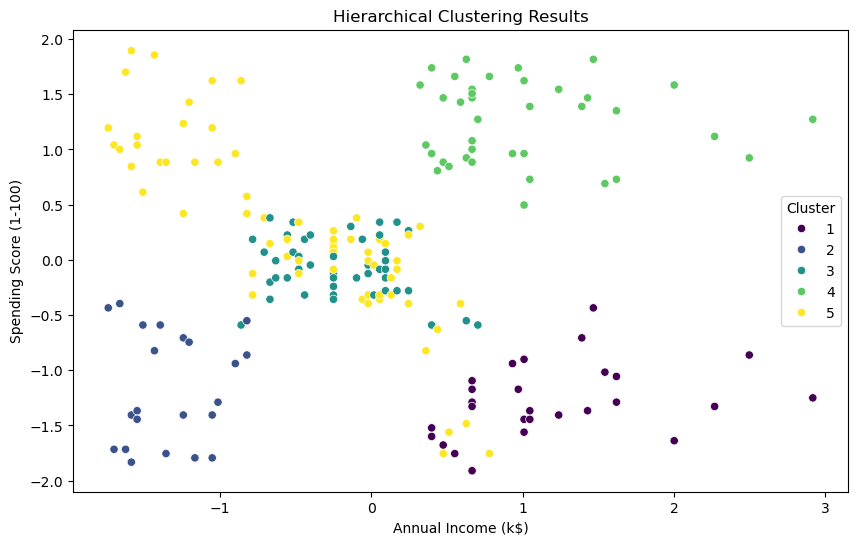

In [313]:
# Visualización de Resultados de Hierarchical Clustering

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X[:, 1], y=X[:, 2], hue=hierarchical_labels, palette='viridis')
plt.title('Hierarchical Clustering Results')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.show()

# Visualizamos los resultados del clustering jerárquico en un gráfico de dispersión.